In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
label = pd.read_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/ddf_with_CUSTNO.pkl')

In [7]:
label.drop('spent_less',axis=1,inplace=True)

In [11]:
import pandas as pd
df = pd.read_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/cluster_label_df.pkl')
df

,CUSTNO,AGEGROUP,GENDER,FREQUENCY,RESIDENCE,TIME,PURCHAMOUNT,CHANNEL,USE_COMP,NUMB_MEM,labels
0,1,9,0,2,1,1,2,0,3,0,4
1,4,9,1,1,1,1,4,0,1,0,4
2,8,9,0,1,1,1,5,0,1,0,4
3,9,9,1,4,2,2,1,0,0,0,4
4,13,9,1,1,2,2,5,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
8813,19361,6,1,1,2,2,5,0,0,1,3
8814,19364,2,1,1,2,1,5,0,0,1,3
8815,19371,7,1,1,1,2,5,0,0,1,3
8816,19372,4,1,2,2,1,2,0,1,0,2


In [12]:
df.labels.value_counts()

1    2986
3    1990
2    1602
0    1294
4     946
Name: labels, dtype: int64

In [13]:
df_labels = df[['labels','CUSTNO']]

In [14]:
data = pd.merge(df_labels,label,how = 'inner')

In [15]:
data

,labels,CUSTNO,cloth_lingerie_purch_diff,cloth_sports_purch_diff,cloth_etc_purch_diff,cloth_business_purch_diff,hobby_media_purch_diff,hobby_pet_purch_diff,hobby_outdoor_purch_diff,hobby_sports_purch_diff,hobby_health_purch_diff,hobby_instex_purch_diff,cloth_women_purch_diff,hobby_golf_purch_diff,A_purch_diff,B_purch_diff,Recency,cloth_highvalue,cloth_lowvalue,cloth_mediumvalue,hobby_highvalue,hobby_lowvalue,hobby_mediumvalue,CLOTH_MEN_PERDAY_VISITING,CLOTH_CASUAL_PERDAY_VISITING,CLOTH_ETC_PERDAY_VISITING,CLOTH_BUSINESS_PERDAY_VISITING,CLOTH_LINGERIE_PERDAY_VISITING,CLOTH_SPORTS_PERDAY_VISITING,CLOTH_WOMEN_PERDAY_VISITING,HOBBY_PET_PERDAY_VISITING,HOBBY_GOLF_PERDAY_VISITING,HOBBY_MEDIA_PERDAY_VISITING,HOBBY_CHILD_PERDAY_VISITING,HOBBY_HEALTH_PERDAY_VISITING,HOBBY_OUTDOOR_PERDAY_VISITING,HOBBY_INSTEX_PERDAY_VISITING,MEMBERSHIP_CAT_2,MEMBERSHIP_CAT_3
0,4,1,0.000000,0.0,-0.000051,-0.000102,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,-0.000050,0.000000,29,3.0,0.0,0.0,0.0,0.0,0.0,-0.0659,0.1099,-0.0110,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0,0
1,4,4,0.000000,0.0,0.000000,0.000253,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,-0.000075,0.000025,0.000046,9,1.0,0.0,0.0,1.0,0.0,0.0,0.0000,-0.0439,0.0000,0.033,0.0000,0.0,0.0,0.0,-0.011,0.0,0.0,0.0,0.000,0.000,0,0
2,4,8,0.000017,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000010,0.000000,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0,0
3,4,9,0.000432,0.0,-0.000656,0.000100,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,-0.000226,0.000000,7,20.0,0.0,0.0,0.0,0.0,0.0,0.0000,-0.0220,-0.2857,0.022,0.0659,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0,0
4,4,13,0.000000,0.0,-0.000017,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,22,2.0,0.0,0.0,0.0,0.0,0.0,0.0000,-0.0110,-0.0110,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8813,3,19361,-0.000021,0.0,0.000000,0.000000,0.0,0.0,0.000703,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000130,16,2.0,1.0,2.0,1.0,0.0,0.0,0.0000,-0.0110,0.0000,0.000,-0.0220,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.011,0.000,0,0
8814,3,19364,0.000000,0.0,-0.000045,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,-0.0110,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0,0
8815,3,19371,0.000000,0.0,0.000000,-0.000083,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,90,1.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,-0.011,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0,1
8816,2,19372,-0.000282,0.0,-0.000065,0.000144,0.0,0.0,0.000000,0.0,0.0,-0.001073,0.0,0.000000,-0.000046,-0.000079,2,17.0,1.0,7.0,0.0,0.0,1.0,0.0110,-0.1648,-0.0220,0.011,-0.0549,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,-0.011,0,0


In [16]:
# df = cluster변수들의 데이터
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()



In [17]:
df1.labels[df1.labels!=0] = 1
df2.labels[df2.labels!=1] = 0
df3.labels[df3.labels!=2] = 0
df4.labels[df4.labels!=3] = 0
df5.labels[df5.labels!=4] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [18]:
df.labels.value_counts()

1    2986
3    1990
2    1602
0    1294
4     946
Name: labels, dtype: int64

In [19]:
df.GENDER.value_counts()

1    7252
0    1566
Name: GENDER, dtype: int64

In [20]:
df.NUMB_MEM.value_counts(0)

0    5849
1    2559
2     378
3      31
4       1
Name: NUMB_MEM, dtype: int64

In [21]:
df

,CUSTNO,AGEGROUP,GENDER,FREQUENCY,RESIDENCE,TIME,PURCHAMOUNT,CHANNEL,USE_COMP,NUMB_MEM,labels
0,1,9,0,2,1,1,2,0,3,0,4
1,4,9,1,1,1,1,4,0,1,0,4
2,8,9,0,1,1,1,5,0,1,0,4
3,9,9,1,4,2,2,1,0,0,0,4
4,13,9,1,1,2,2,5,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
8813,19361,6,1,1,2,2,5,0,0,1,3
8814,19364,2,1,1,2,1,5,0,0,1,3
8815,19371,7,1,1,1,2,5,0,0,1,3
8816,19372,4,1,2,2,1,2,0,1,0,2


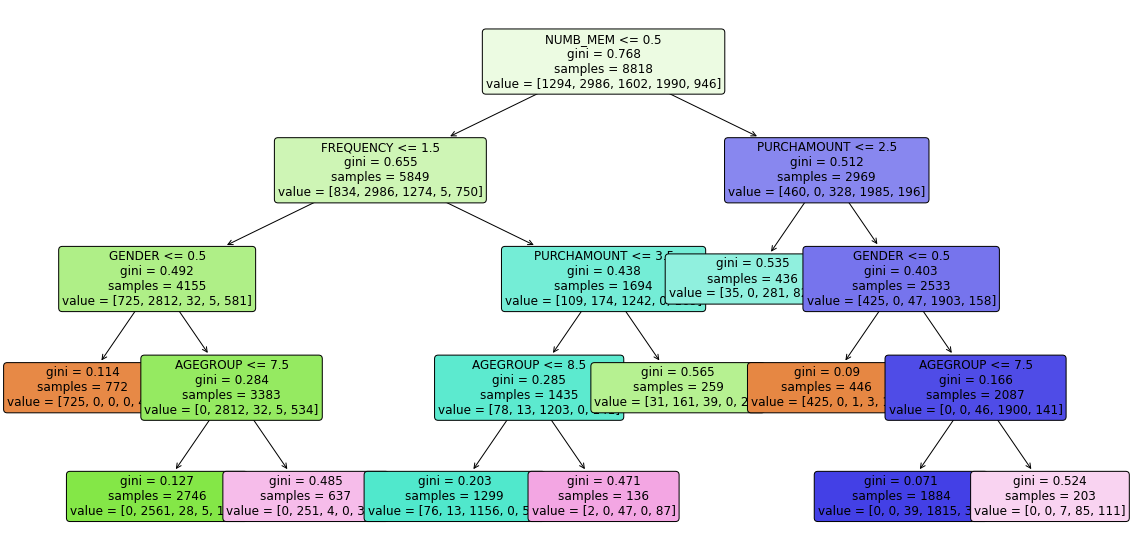

In [22]:
X_features = df.drop(['labels','CUSTNO'],axis=1)
y_label =  df.labels
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(data, target,
#                                                     test_size=0.2, random_state=0)
from sklearn import tree
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# from sklearn.model_selection import GridSearchCV
# dt_clf = DecisionTreeClassifier()
# parameters = {'min_samples_split':[100,200],'max_features':[5,10,15,20],'max_depth':[5,7,10,15,20]}

# grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
# grid_dtree.fit(X_features,y_label)

# print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
# print('GridSearchCV 최고 정확도: {0:4f}'.format(grid_dtree.best_score_))



dt_tree = DecisionTreeClassifier(min_samples_leaf= 100, max_features=8,max_depth=15,max_leaf_nodes=10)
dt_tree.fit(X_features,y_label)
# pred = dt_tree.predict(X_test)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_tree, filled=True,
              feature_names=X_features.columns,
             
              rounded=True, fontsize=12)
plt.show()
plt.close()

# #0  클러스터
# 1/3 남성 멤버십가입자, 2/3멤버십 미가입남성-

# #1 클러스터
# -멤버십 미가입자 , FREQUENCY<= 1.5미만(구매잘안함), 

# #2 클러스터
# 1/5 멤버십 가입 여성, 4/5 멤버십미가입여성, 구매빈도는 평균, PURCHAMOUNT는 넓게 분포(평균) (가장중요고객)

# #3 클러스터 
# -멤버십 가입자, 여성, PURCHAMOUNT기준 3이상이 95%이상 (가장돈을 많이 소비한고객)

# #4 클러스터
# 1/5 멤버십가입 여성(비교적 돈을 많이소비), 4/5 멤버십 미가입여성(FREQUENCY가 낮은고객이 대부분), 

In [23]:
df[df.labels==2].count()

CUSTNO         1602
AGEGROUP       1602
GENDER         1602
FREQUENCY      1602
RESIDENCE      1602
TIME           1602
PURCHAMOUNT    1602
CHANNEL        1602
USE_COMP       1602
NUMB_MEM       1602
labels         1602
dtype: int64

In [24]:
data.iloc[:,22:36]

,hobby_mediumvalue,CLOTH_MEN_PERDAY_VISITING,CLOTH_CASUAL_PERDAY_VISITING,CLOTH_ETC_PERDAY_VISITING,CLOTH_BUSINESS_PERDAY_VISITING,CLOTH_LINGERIE_PERDAY_VISITING,CLOTH_SPORTS_PERDAY_VISITING,CLOTH_WOMEN_PERDAY_VISITING,HOBBY_PET_PERDAY_VISITING,HOBBY_GOLF_PERDAY_VISITING,HOBBY_MEDIA_PERDAY_VISITING,HOBBY_CHILD_PERDAY_VISITING,HOBBY_HEALTH_PERDAY_VISITING,HOBBY_OUTDOOR_PERDAY_VISITING
0,0.0,-0.0659,0.1099,-0.0110,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
1,0.0,0.0000,-0.0439,0.0000,0.033,0.0000,0.0,0.0,0.0,-0.011,0.0,0.0,0.0,0.000
2,0.0,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
3,0.0,0.0000,-0.0220,-0.2857,0.022,0.0659,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
4,0.0,0.0000,-0.0110,-0.0110,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8813,0.0,0.0000,-0.0110,0.0000,0.000,-0.0220,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.011
8814,0.0,0.0000,0.0000,-0.0110,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
8815,0.0,0.0000,0.0000,0.0000,-0.011,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
8816,1.0,0.0110,-0.1648,-0.0220,0.011,-0.0549,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000


In [25]:
data

,labels,CUSTNO,cloth_lingerie_purch_diff,cloth_sports_purch_diff,cloth_etc_purch_diff,cloth_business_purch_diff,hobby_media_purch_diff,hobby_pet_purch_diff,hobby_outdoor_purch_diff,hobby_sports_purch_diff,hobby_health_purch_diff,hobby_instex_purch_diff,cloth_women_purch_diff,hobby_golf_purch_diff,A_purch_diff,B_purch_diff,Recency,cloth_highvalue,cloth_lowvalue,cloth_mediumvalue,hobby_highvalue,hobby_lowvalue,hobby_mediumvalue,CLOTH_MEN_PERDAY_VISITING,CLOTH_CASUAL_PERDAY_VISITING,CLOTH_ETC_PERDAY_VISITING,CLOTH_BUSINESS_PERDAY_VISITING,CLOTH_LINGERIE_PERDAY_VISITING,CLOTH_SPORTS_PERDAY_VISITING,CLOTH_WOMEN_PERDAY_VISITING,HOBBY_PET_PERDAY_VISITING,HOBBY_GOLF_PERDAY_VISITING,HOBBY_MEDIA_PERDAY_VISITING,HOBBY_CHILD_PERDAY_VISITING,HOBBY_HEALTH_PERDAY_VISITING,HOBBY_OUTDOOR_PERDAY_VISITING,HOBBY_INSTEX_PERDAY_VISITING,MEMBERSHIP_CAT_2,MEMBERSHIP_CAT_3
0,4,1,0.000000,0.0,-0.000051,-0.000102,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,-0.000050,0.000000,29,3.0,0.0,0.0,0.0,0.0,0.0,-0.0659,0.1099,-0.0110,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0,0
1,4,4,0.000000,0.0,0.000000,0.000253,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,-0.000075,0.000025,0.000046,9,1.0,0.0,0.0,1.0,0.0,0.0,0.0000,-0.0439,0.0000,0.033,0.0000,0.0,0.0,0.0,-0.011,0.0,0.0,0.0,0.000,0.000,0,0
2,4,8,0.000017,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000010,0.000000,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0,0
3,4,9,0.000432,0.0,-0.000656,0.000100,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,-0.000226,0.000000,7,20.0,0.0,0.0,0.0,0.0,0.0,0.0000,-0.0220,-0.2857,0.022,0.0659,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0,0
4,4,13,0.000000,0.0,-0.000017,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,22,2.0,0.0,0.0,0.0,0.0,0.0,0.0000,-0.0110,-0.0110,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8813,3,19361,-0.000021,0.0,0.000000,0.000000,0.0,0.0,0.000703,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000130,16,2.0,1.0,2.0,1.0,0.0,0.0,0.0000,-0.0110,0.0000,0.000,-0.0220,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.011,0.000,0,0
8814,3,19364,0.000000,0.0,-0.000045,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,-0.0110,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0,0
8815,3,19371,0.000000,0.0,0.000000,-0.000083,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,90,1.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,-0.011,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0,1
8816,2,19372,-0.000282,0.0,-0.000065,0.000144,0.0,0.0,0.000000,0.0,0.0,-0.001073,0.0,0.000000,-0.000046,-0.000079,2,17.0,1.0,7.0,0.0,0.0,1.0,0.0110,-0.1648,-0.0220,0.011,-0.0549,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,-0.011,0,0


In [26]:
data.drop('CUSTNO',axis=1,inplace=True)

In [27]:
data.iloc[:,22:36]

,CLOTH_MEN_PERDAY_VISITING,CLOTH_CASUAL_PERDAY_VISITING,CLOTH_ETC_PERDAY_VISITING,CLOTH_BUSINESS_PERDAY_VISITING,CLOTH_LINGERIE_PERDAY_VISITING,CLOTH_SPORTS_PERDAY_VISITING,CLOTH_WOMEN_PERDAY_VISITING,HOBBY_PET_PERDAY_VISITING,HOBBY_GOLF_PERDAY_VISITING,HOBBY_MEDIA_PERDAY_VISITING,HOBBY_CHILD_PERDAY_VISITING,HOBBY_HEALTH_PERDAY_VISITING,HOBBY_OUTDOOR_PERDAY_VISITING,HOBBY_INSTEX_PERDAY_VISITING
0,-0.0659,0.1099,-0.0110,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000
1,0.0000,-0.0439,0.0000,0.033,0.0000,0.0,0.0,0.0,-0.011,0.0,0.0,0.0,0.000,0.000
2,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000
3,0.0000,-0.0220,-0.2857,0.022,0.0659,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000
4,0.0000,-0.0110,-0.0110,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8813,0.0000,-0.0110,0.0000,0.000,-0.0220,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.011,0.000
8814,0.0000,0.0000,-0.0110,0.000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000
8815,0.0000,0.0000,0.0000,-0.011,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000
8816,0.0110,-0.1648,-0.0220,0.011,-0.0549,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,-0.011


In [28]:
data.iloc[:,1:15] = round(data.iloc[:,1:15]*10000,5) #Purchdiff *10000을해줌

In [29]:
data.iloc[:,22:36] = round(data.iloc[:,22:36]*91,2)   #가을시즌 총 방문횟수로 변경

In [30]:

data1 = data.copy()
data2 = data.copy()
data3 = data.copy()
data4 = data.copy()
data5 = data.copy()
# data = 기존데이터 1~5 까지 분류 (나중 중요한 cluster는 본모델에 하나씩 돌려보기 위함.)
data1.labels[data1.labels!=0] = 1
data2.labels[data2.labels!=1] = 0
data3.labels[data3.labels!=2] = 0
data4.labels[data4.labels!=3] = 0
data5.labels[data5.labels!=4] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dis

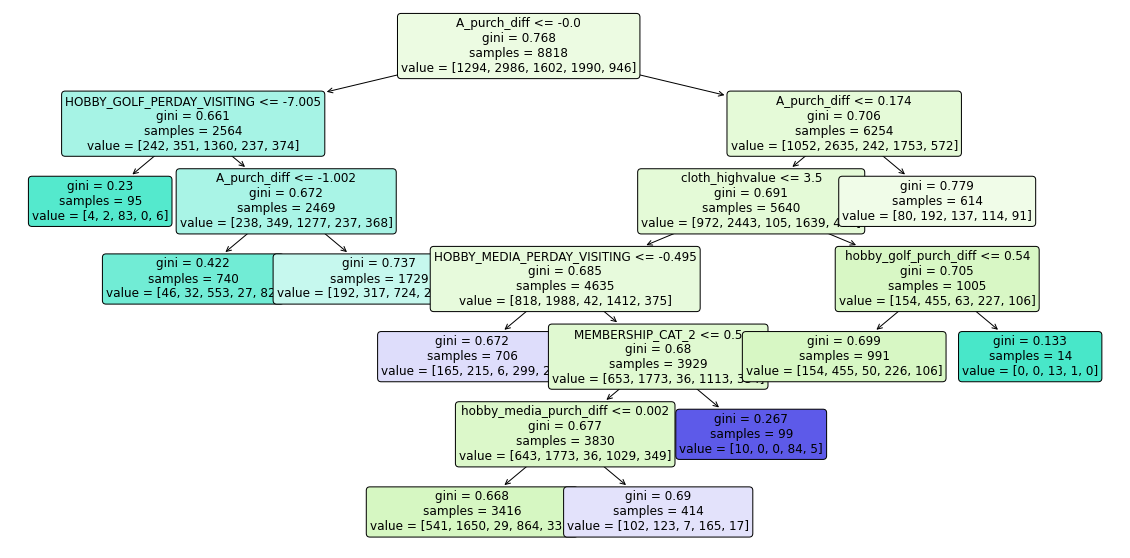

In [31]:
#전체 data DT
features = data.drop(['labels'],axis=1)

target=  data.labels

from sklearn.tree import export_graphviz

# from sklearn.model_selection import GridSearchCV
# dt_clf = DecisionTreeClassifier()
# parameters = {'min_samples_split':[100,200],'max_features':[5,10,15,20],'max_depth':[5,7,10,15,20]}

# grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
# grid_dtree.fit(X_features,y_label)

# print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
# print('GridSearchCV 최고 정확도: {0:4f}'.format(grid_dtree.best_score_))



from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=5,max_depth=20,max_leaf_nodes=10)
dt_tree.fit(features,target)

plt.figure(figsize=(20,10))
tree.plot_tree(dt_tree, filled=True,
              feature_names=features.columns,
             
              rounded=True, fontsize=12)
plt.show()
plt.close()




In [32]:
df[df.labels == 1].count()

CUSTNO         2986
AGEGROUP       2986
GENDER         2986
FREQUENCY      2986
RESIDENCE      2986
TIME           2986
PURCHAMOUNT    2986
CHANNEL        2986
USE_COMP       2986
NUMB_MEM       2986
labels         2986
dtype: int64

In [33]:
k =data1[data1.labels==0]
k[k.hobby_sports_purch_diff<0] 

,labels,cloth_lingerie_purch_diff,cloth_sports_purch_diff,cloth_etc_purch_diff,cloth_business_purch_diff,hobby_media_purch_diff,hobby_pet_purch_diff,hobby_outdoor_purch_diff,hobby_sports_purch_diff,hobby_health_purch_diff,hobby_instex_purch_diff,cloth_women_purch_diff,hobby_golf_purch_diff,A_purch_diff,B_purch_diff,Recency,cloth_highvalue,cloth_lowvalue,cloth_mediumvalue,hobby_highvalue,hobby_lowvalue,hobby_mediumvalue,CLOTH_MEN_PERDAY_VISITING,CLOTH_CASUAL_PERDAY_VISITING,CLOTH_ETC_PERDAY_VISITING,CLOTH_BUSINESS_PERDAY_VISITING,CLOTH_LINGERIE_PERDAY_VISITING,CLOTH_SPORTS_PERDAY_VISITING,CLOTH_WOMEN_PERDAY_VISITING,HOBBY_PET_PERDAY_VISITING,HOBBY_GOLF_PERDAY_VISITING,HOBBY_MEDIA_PERDAY_VISITING,HOBBY_CHILD_PERDAY_VISITING,HOBBY_HEALTH_PERDAY_VISITING,HOBBY_OUTDOOR_PERDAY_VISITING,HOBBY_INSTEX_PERDAY_VISITING,MEMBERSHIP_CAT_2,MEMBERSHIP_CAT_3
564,0,0.00000,-1.19396,0.00000,0.0000,0.00000,0.00000,0.00000,-14.68692,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,43,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,-1.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0
2023,0,0.00774,-4.52999,0.00000,0.0000,0.00000,0.00000,-1.61192,-55.72349,0.00000,0.00000,0.00000,0.00000,0.00000,-0.29701,13,0.0,0.0,0.0,4.0,1.0,0.0,0.0,1.00,0.00,0.0,0.00,-1.0,0.0,0.0,0.0,0.00,0.00,0.0,-3.00,0.0,0,0
2572,0,0.15428,-1.28638,-0.43813,0.0000,5.58631,0.00000,-8.01508,-28.00175,0.00000,0.00000,0.00000,0.00000,0.00000,-1.48209,17,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.00,-2.00,0.0,-1.00,0.0,0.0,0.0,0.0,3.00,-1.00,0.0,-2.99,0.0,0,1
3240,0,0.00000,-1.45688,-0.12289,0.0000,0.00000,0.00000,0.00000,-17.92112,0.00000,0.00000,0.00000,-0.09052,-0.98500,0.00000,1,23.0,0.0,1.0,1.0,0.0,0.0,0.0,-21.99,-1.00,0.0,0.00,-1.0,0.0,0.0,-1.0,0.00,0.00,0.0,0.00,0.0,0,0
3598,0,-0.16309,-6.82913,0.00000,0.0000,0.00000,-0.33638,2.06023,-84.00526,0.00000,0.00000,0.00000,0.00000,0.02273,-0.77500,27,2.0,0.0,6.0,1.0,1.0,1.0,0.0,-2.99,0.00,0.0,-1.00,-2.0,0.0,-1.0,0.0,0.00,0.00,0.0,2.00,0.0,0,0
3665,0,0.00000,13.14264,0.00000,0.0000,-3.94118,-6.01886,-2.90915,-21.00131,0.00000,0.00000,-8.12018,0.00000,0.00000,-0.44672,17,0.0,0.0,1.0,0.0,4.0,4.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-4.0,0.0,-1.00,0.00,0.0,-2.00,0.0,0,0
3790,0,0.00285,-15.13791,0.00000,0.0000,-10.35945,-0.36041,-9.06000,-186.21166,0.00000,0.00000,0.00000,0.00000,0.10955,-2.40712,1,7.0,0.0,4.0,0.0,2.0,2.0,0.0,-4.00,0.00,0.0,-3.99,-3.0,0.0,-1.0,0.0,-3.99,2.99,0.0,-1.00,0.0,0,0
3816,0,0.51211,-0.56909,-0.13585,0.0000,0.00000,0.00000,0.00000,-7.00044,0.00000,0.00000,0.00000,0.00000,0.17216,0.69168,3,4.0,0.0,1.0,0.0,0.0,1.0,-2.0,-1.99,0.00,0.0,1.00,-1.0,0.0,0.0,0.0,0.00,1.00,0.0,0.00,0.0,0,0
3871,0,-0.43778,-9.61770,-0.27143,0.0000,0.00000,3.92702,0.00000,-118.30741,0.00000,0.00000,0.00000,0.00000,0.00000,-0.55950,11,1.0,2.0,5.0,0.0,5.0,1.0,0.0,2.99,-2.00,0.0,-3.00,-2.0,0.0,2.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0
4002,0,-0.05436,-1.36583,0.00000,0.0000,-61.70117,-0.66075,-5.02509,-16.80105,0.00000,11.24902,0.00000,0.00000,0.29515,-4.21725,2,2.0,0.0,0.0,0.0,0.0,6.0,0.0,2.00,0.00,0.0,-1.00,-1.0,0.0,-1.0,0.0,-3.00,1.00,0.0,-3.00,1.0,0,0


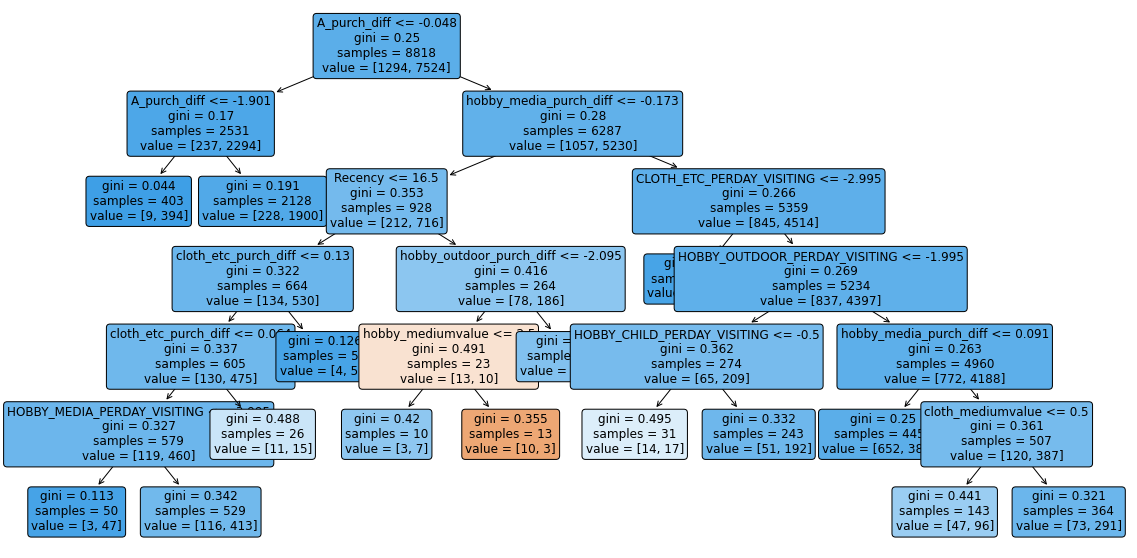

In [34]:
# cluster 0 

features = data1.drop(['labels'],axis=1)

target=  data1.labels

from sklearn.tree import export_graphviz

# from sklearn.model_selection import GridSearchCV
# dt_clf = DecisionTreeClassifier()
# parameters = {'min_samples_split':[100,200],'max_features':[5,10,15,20],'max_depth':[5,7,10,15,20]}

# grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
# grid_dtree.fit(X_features,y_label)

# print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
# print('GridSearchCV 최고 정확도: {0:4f}'.format(grid_dtree.best_score_))



from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=10,max_depth=11,max_leaf_nodes=15)
dt_tree.fit(features,target)

plt.figure(figsize=(20,10))
tree.plot_tree(dt_tree, filled=True,
              feature_names=features.columns,
             
              rounded=True, fontsize=12)
plt.show()
plt.close()

#cluster 0 그룹 - 1294명
## 1/3 남성 멤버십가입자, 2/3멤버십 미가입남성- 소수의 여성(구매빈도가 낮음) 
## HOBBY_HEALTH_PERDAY_VISITING 감소 혹은 유지고객이 99%
#1. A제휴사 셰어가 유지하거나 증가한고객이 많다.
#2. 의류_속옷 하루 방문횟수가 유지하거나 증가한고객이 많다.
#3. 고가의류의 변동폭이 크지않은 고객이 많다(90%)
#4. 취미_아동 방문고객이 유지하거나 감소한고객이 많다.
#5. 취미_고가의 변동이 없거나, 적은사람이 많다.
#6. hobby_media_perday_visiting 변동이 없거나 감소한사람이 많다 (90%이상)
#7. 여성옷 방문횟수의 변동이 없거나 감소한사람이 많다(99%)
#8. CASUAL옷 방문횟수의 변동이 없거나 감소한 사람이 많다(95) -- * 변동이 감소한사람은 70%수준 -중요
#9. HOBBYSPORTS이용고객 30명중 3명을 제외하고 구매가 감소하였다.


In [35]:

x.value_counts()

NameError: ignored

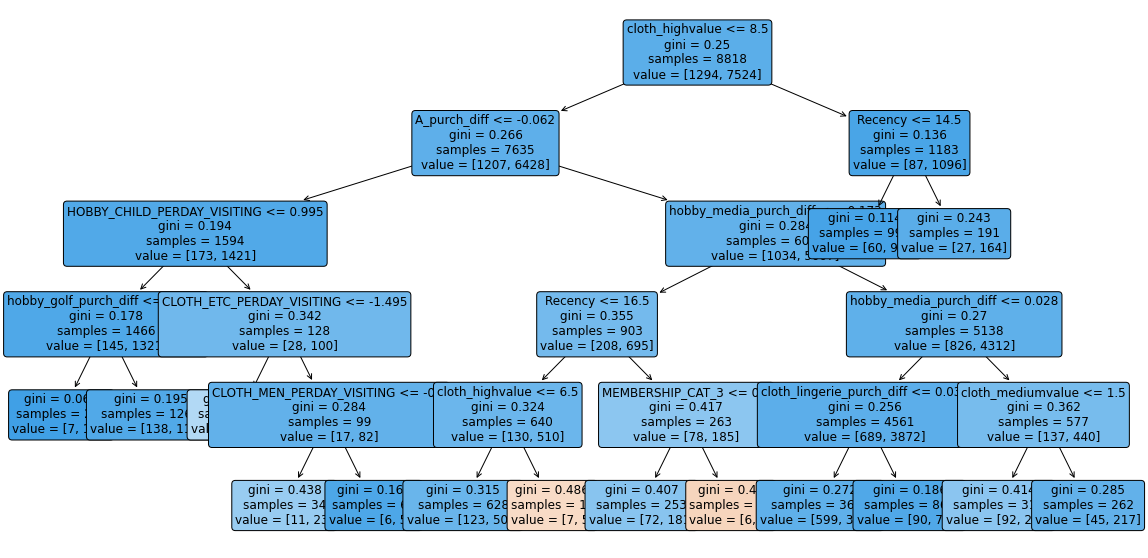

In [36]:
features = data1.drop(['labels'],axis=1)
target=  data1.labels
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.2, random_state=0)
from sklearn import tree
# from sklearn.tree import export_graphviz

# from sklearn.model_selection import GridSearchCV
# dt_clf = DecisionTreeClassifier()
# parameters = {'min_samples_split':[100,200],'max_features':[5,10,15,20],'max_depth':[5,7,10,15,20]}

# grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
# grid_dtree.fit(features,target)

# print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
# print('GridSearchCV 최고 정확도: {0:4f}'.format(grid_dtree.best_score_))



from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=15,max_depth=5,max_leaf_nodes=15)
dt_tree.fit(features,target)
pred = dt_tree.predict(X_test)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_tree, filled=True,
              feature_names=X_train.columns,
             
              rounded=True, fontsize=12)
plt.show()
plt.close()
#cluster 1그룹 -# -멤버십 미가입자 , FREQUENCY<= 1.5미만(구매잘안함)
#취미_고가에서 변동성이 있는고객이 50%가량
#취미_중가에서 변동성이 적은고객이 많음
#HOBBY_OUTDOOR_PERDAY_VISITING이 유지 혹은 감소한사람이 많다(90%)
#4. B제휴사에서 셰어증감이 유지, 혹은 감소한 사람이 많다(80%)
#1. A제휴사의 셰어증감이 유지 혹은 감소한사람이 많다. (80%)
#여성의류 방문횟수 유지 혹은 감소한사람이 많다(98%) 

In [37]:
k[k.CLOTH_WOMEN_PERDAY_VISITING<=0]

,labels,cloth_lingerie_purch_diff,cloth_sports_purch_diff,cloth_etc_purch_diff,cloth_business_purch_diff,hobby_media_purch_diff,hobby_pet_purch_diff,hobby_outdoor_purch_diff,hobby_sports_purch_diff,hobby_health_purch_diff,hobby_instex_purch_diff,cloth_women_purch_diff,hobby_golf_purch_diff,A_purch_diff,B_purch_diff,Recency,cloth_highvalue,cloth_lowvalue,cloth_mediumvalue,hobby_highvalue,hobby_lowvalue,hobby_mediumvalue,CLOTH_MEN_PERDAY_VISITING,CLOTH_CASUAL_PERDAY_VISITING,CLOTH_ETC_PERDAY_VISITING,CLOTH_BUSINESS_PERDAY_VISITING,CLOTH_LINGERIE_PERDAY_VISITING,CLOTH_SPORTS_PERDAY_VISITING,CLOTH_WOMEN_PERDAY_VISITING,HOBBY_PET_PERDAY_VISITING,HOBBY_GOLF_PERDAY_VISITING,HOBBY_MEDIA_PERDAY_VISITING,HOBBY_CHILD_PERDAY_VISITING,HOBBY_HEALTH_PERDAY_VISITING,HOBBY_OUTDOOR_PERDAY_VISITING,HOBBY_INSTEX_PERDAY_VISITING,MEMBERSHIP_CAT_2,MEMBERSHIP_CAT_3
430,0,-0.20029,0.00000,0.19536,-0.84897,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.04263,0.00000,55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
478,0,0.00000,0.00000,0.00000,-1.97390,0.00000,-0.60068,0.00000,0.00000,0.0,0.0,0.0,-1.27977,-0.79855,0.00000,16,11.0,0.0,0.0,2.0,1.0,0.0,0.0,-10.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-2.0,0.0,0.0,0.0,0.0,0.0,0,0
564,0,0.00000,-1.19396,0.00000,0.00000,0.00000,0.00000,0.00000,-14.68692,0.0,0.0,0.0,0.00000,0.00000,0.00000,43,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
566,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,-1.00000,15,0.0,0.0,4.0,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
568,0,0.00000,0.00000,-0.21016,-14.53399,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,-0.18416,-0.86560,0.00000,2,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.0,-4.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8793,0,0.00000,0.00000,0.00000,0.00000,0.00000,-0.48055,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,82,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8797,0,-14.93597,0.00000,-0.31417,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,-1.60689,-0.51703,0.00000,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,-2.0,0.0,-4.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0,0
8803,0,-0.92849,0.00000,-0.05896,0.00000,-0.97734,0.00000,0.37062,0.00000,0.0,0.0,0.0,0.00000,0.00101,-0.83143,19,2.0,0.0,6.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0,0
8805,0,-0.13572,0.00000,0.00000,-1.11285,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.02678,0.02976,31,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [38]:
k= data1[data1.labels ==0]
k[data1.B_purch_diff>0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,labels,cloth_lingerie_purch_diff,cloth_sports_purch_diff,cloth_etc_purch_diff,cloth_business_purch_diff,hobby_media_purch_diff,hobby_pet_purch_diff,hobby_outdoor_purch_diff,hobby_sports_purch_diff,hobby_health_purch_diff,hobby_instex_purch_diff,cloth_women_purch_diff,hobby_golf_purch_diff,A_purch_diff,B_purch_diff,Recency,cloth_highvalue,cloth_lowvalue,cloth_mediumvalue,hobby_highvalue,hobby_lowvalue,hobby_mediumvalue,CLOTH_MEN_PERDAY_VISITING,CLOTH_CASUAL_PERDAY_VISITING,CLOTH_ETC_PERDAY_VISITING,CLOTH_BUSINESS_PERDAY_VISITING,CLOTH_LINGERIE_PERDAY_VISITING,CLOTH_SPORTS_PERDAY_VISITING,CLOTH_WOMEN_PERDAY_VISITING,HOBBY_PET_PERDAY_VISITING,HOBBY_GOLF_PERDAY_VISITING,HOBBY_MEDIA_PERDAY_VISITING,HOBBY_CHILD_PERDAY_VISITING,HOBBY_HEALTH_PERDAY_VISITING,HOBBY_OUTDOOR_PERDAY_VISITING,HOBBY_INSTEX_PERDAY_VISITING,MEMBERSHIP_CAT_2,MEMBERSHIP_CAT_3
649,0,-0.12590,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.05238,17,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-1.00,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
699,0,-0.14306,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,0.0,5.14455,0.00000,0.0,0.00000,0.08190,0.04643,23,1.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.00,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
724,0,0.00000,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.34524,59,2.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
732,0,0.00000,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.02855,0.17978,15,10.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
778,0,-0.34440,3.95998,0.0,0.31827,0.00000,44.0661,0.00000,0.0,26.84401,0.00000,0.0,-0.62116,0.03761,0.52523,16,1.0,0.0,3.0,2.0,23.0,8.0,0.0,-3.99,0.0,1.0,0.0,1.0,0.0,24.0,-2.0,0.0,0.0,5.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8728,0,0.17412,0.00000,0.0,0.00000,-2.84130,0.0000,-2.10847,0.0,0.00000,0.00000,0.0,0.00000,0.01644,0.19226,48,1.0,0.0,2.0,0.0,1.0,2.0,0.0,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,-1.0,0.0,1,0
8732,0,0.00000,0.00000,0.0,0.00000,5.92802,0.0000,0.00000,0.0,5.80411,3.40879,0.0,0.00000,0.00000,0.54525,2,1.0,0.0,0.0,0.0,0.0,2.0,0.0,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-2.0,1.0,0.0,1.0,0,0
8741,0,-0.09871,0.00000,0.0,0.00000,1.48249,0.0000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.26608,22,0.0,0.0,2.0,0.0,0.0,1.0,0.0,-1.00,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
8778,0,-0.04386,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.16607,7,1.0,0.0,3.0,0.0,0.0,0.0,0.0,-2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [39]:
k = data2[data2.labels ==1]
k[k.CLOTH_CASUAL_PERDAY_VISITING<0]

,labels,cloth_lingerie_purch_diff,cloth_sports_purch_diff,cloth_etc_purch_diff,cloth_business_purch_diff,hobby_media_purch_diff,hobby_pet_purch_diff,hobby_outdoor_purch_diff,hobby_sports_purch_diff,hobby_health_purch_diff,hobby_instex_purch_diff,cloth_women_purch_diff,hobby_golf_purch_diff,A_purch_diff,B_purch_diff,Recency,cloth_highvalue,cloth_lowvalue,cloth_mediumvalue,hobby_highvalue,hobby_lowvalue,hobby_mediumvalue,CLOTH_MEN_PERDAY_VISITING,CLOTH_CASUAL_PERDAY_VISITING,CLOTH_ETC_PERDAY_VISITING,CLOTH_BUSINESS_PERDAY_VISITING,CLOTH_LINGERIE_PERDAY_VISITING,CLOTH_SPORTS_PERDAY_VISITING,CLOTH_WOMEN_PERDAY_VISITING,HOBBY_PET_PERDAY_VISITING,HOBBY_GOLF_PERDAY_VISITING,HOBBY_MEDIA_PERDAY_VISITING,HOBBY_CHILD_PERDAY_VISITING,HOBBY_HEALTH_PERDAY_VISITING,HOBBY_OUTDOOR_PERDAY_VISITING,HOBBY_INSTEX_PERDAY_VISITING,MEMBERSHIP_CAT_2,MEMBERSHIP_CAT_3
784,1,-0.27312,4.45498,0.00000,0.0,0.0,0.0,0.0,0.0,-1.42017,0.0,-2.92326,0.00000,0.05358,0.09405,21,2.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.99,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
871,1,0.00000,0.00000,0.03387,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.10119,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
883,1,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.00000,-1.31606,7,1.0,1.0,2.0,0.0,0.0,0.0,0.0,-6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
929,1,0.00000,0.00000,0.01295,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,-8.76979,0.00000,0.00218,-0.31309,12,1.0,0.0,3.0,0.0,0.0,1.0,0.0,-3.00,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
965,1,-1.16468,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,4.19445,0.00000,0.01590,0.20357,18,5.0,3.0,3.0,0.0,0.0,0.0,0.0,-2.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,1,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,31,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8802,1,0.00000,0.00000,-8.90610,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,-0.18728,-2.00000,0.00000,15,7.0,0.0,0.0,1.0,0.0,0.0,0.0,-5.00,-2.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0
8808,1,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.18572,25,1.0,0.0,2.0,0.0,0.0,0.0,0.0,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8809,1,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,52,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [40]:
k = data2[data2.labels == 1]
k[k.HOBBY_PET_PERDAY_VISITING<=0]

,labels,cloth_lingerie_purch_diff,cloth_sports_purch_diff,cloth_etc_purch_diff,cloth_business_purch_diff,hobby_media_purch_diff,hobby_pet_purch_diff,hobby_outdoor_purch_diff,hobby_sports_purch_diff,hobby_health_purch_diff,hobby_instex_purch_diff,cloth_women_purch_diff,hobby_golf_purch_diff,A_purch_diff,B_purch_diff,Recency,cloth_highvalue,cloth_lowvalue,cloth_mediumvalue,hobby_highvalue,hobby_lowvalue,hobby_mediumvalue,CLOTH_MEN_PERDAY_VISITING,CLOTH_CASUAL_PERDAY_VISITING,CLOTH_ETC_PERDAY_VISITING,CLOTH_BUSINESS_PERDAY_VISITING,CLOTH_LINGERIE_PERDAY_VISITING,CLOTH_SPORTS_PERDAY_VISITING,CLOTH_WOMEN_PERDAY_VISITING,HOBBY_PET_PERDAY_VISITING,HOBBY_GOLF_PERDAY_VISITING,HOBBY_MEDIA_PERDAY_VISITING,HOBBY_CHILD_PERDAY_VISITING,HOBBY_HEALTH_PERDAY_VISITING,HOBBY_OUTDOOR_PERDAY_VISITING,HOBBY_INSTEX_PERDAY_VISITING,MEMBERSHIP_CAT_2,MEMBERSHIP_CAT_3
784,1,-0.27312,4.45498,0.00000,0.00000,0.0,0.0000,0.0,0.0,-1.42017,0.0,-2.92326,0.00000,0.05358,0.09405,21,2.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.99,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
871,1,0.00000,0.00000,0.03387,0.00000,0.0,0.0000,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.10119,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
883,1,0.00000,0.00000,0.00000,0.00000,0.0,0.0000,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.00000,-1.31606,7,1.0,1.0,2.0,0.0,0.0,0.0,0.0,-6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
929,1,0.00000,0.00000,0.01295,0.00000,0.0,0.0000,0.0,0.0,0.00000,0.0,-8.76979,0.00000,0.00218,-0.31309,12,1.0,0.0,3.0,0.0,0.0,1.0,0.0,-3.00,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
939,1,0.00000,0.00000,0.00000,0.00000,0.0,-0.9611,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.05295,0.00000,73,3.0,0.0,0.0,0.0,0.0,1.0,0.0,3.00,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,1,0.00000,0.00000,-8.90610,0.00000,0.0,0.0000,0.0,0.0,0.00000,0.0,0.00000,-0.18728,-2.00000,0.00000,15,7.0,0.0,0.0,1.0,0.0,0.0,0.0,-5.00,-2.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0
8806,1,-0.17168,0.00000,-0.60910,-3.41781,0.0,0.0000,0.0,0.0,0.00000,0.0,0.00000,-1.32659,0.03355,0.00000,9,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.00,-2.0,-3.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0,0
8808,1,0.00000,0.00000,0.00000,0.00000,0.0,0.0000,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.18572,25,1.0,0.0,2.0,0.0,0.0,0.0,0.0,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8809,1,0.00000,0.00000,0.00000,0.00000,0.0,0.0000,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,52,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


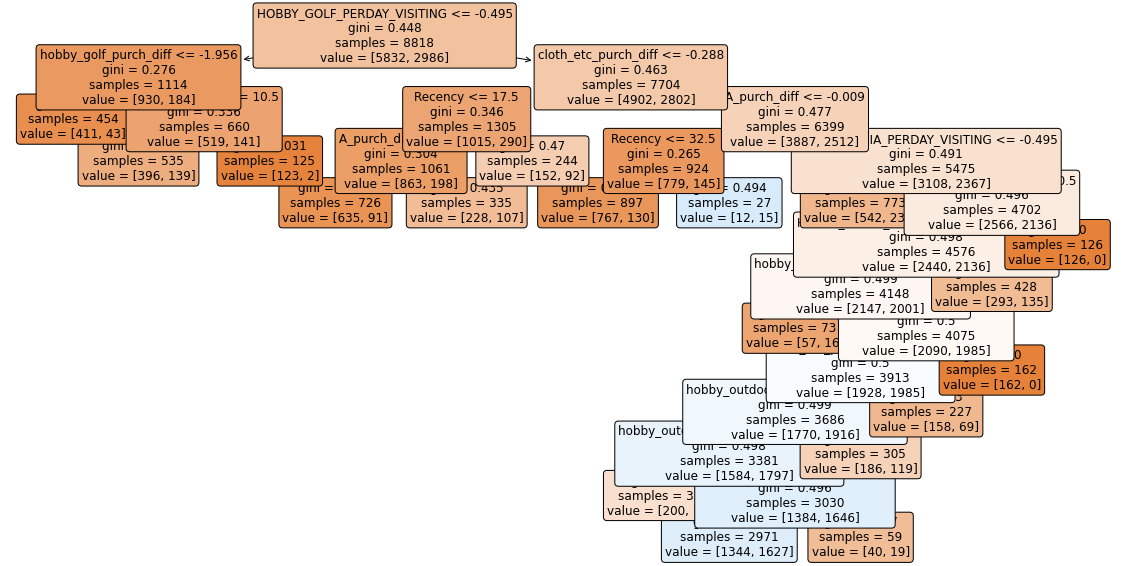

In [41]:
features = data2.drop(['labels'],axis=1)
target=  data2.labels
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.2, random_state=0)
from sklearn import tree
# from sklearn.tree import export_graphviz

# from sklearn.model_selection import GridSearchCV
# dt_clf = DecisionTreeClassifier()
# parameters = {'min_samples_split':[100,200],'max_features':[5,10,15,20],'max_depth':[5,7,10,15,20]}

# grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
# grid_dtree.fit(features,target)

# print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
# print('GridSearchCV 최고 정확도: {0:4f}'.format(grid_dtree.best_score_))



from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=10,max_depth=15,max_leaf_nodes=18)
dt_tree.fit(features,target)
pred = dt_tree.predict(X_test)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_tree, filled=True,
              feature_names=X_train.columns,
             
              rounded=True, fontsize=12)
plt.show()
plt.close()



#cluster 2그룹 (# 1/5 멤버십 가입 여성, 4/5 멤버십미가입여성, 구매빈도는 평균, PURCHAMOUNT는 넓게 분포(평균)

#1. A제휴사의 셰어증감이 유지 혹은 증가한사람이 많다.
#2. 취미_미디어 셰어증감에서 유지한사람이 많다.
#3. 취미_고가에서 변동성이 없는고객이 많다 (80%이상)
#4. 의류_캐주얼 총방문횟수 감소 혹은 유지고객이 많다(85%) - 감소고객 = 70%!!
#5. 의류_여성 총 방문횟소 감소 혹은 유지고객이 많다(95%)
#6. 취미_PET 감소 혹은 유지고객 (95%수준) 

In [67]:
k = data4[data4.labels ==3]
k[k.ㅠ_purch_diff==0]

,labels,cloth_lingerie_purch_diff,cloth_sports_purch_diff,cloth_etc_purch_diff,cloth_business_purch_diff,hobby_media_purch_diff,hobby_pet_purch_diff,hobby_outdoor_purch_diff,hobby_sports_purch_diff,hobby_health_purch_diff,hobby_instex_purch_diff,cloth_women_purch_diff,hobby_golf_purch_diff,A_purch_diff,B_purch_diff,Recency,cloth_highvalue,cloth_lowvalue,cloth_mediumvalue,hobby_highvalue,hobby_lowvalue,hobby_mediumvalue,CLOTH_MEN_PERDAY_VISITING,CLOTH_CASUAL_PERDAY_VISITING,CLOTH_ETC_PERDAY_VISITING,CLOTH_BUSINESS_PERDAY_VISITING,CLOTH_LINGERIE_PERDAY_VISITING,CLOTH_SPORTS_PERDAY_VISITING,CLOTH_WOMEN_PERDAY_VISITING,HOBBY_PET_PERDAY_VISITING,HOBBY_GOLF_PERDAY_VISITING,HOBBY_MEDIA_PERDAY_VISITING,HOBBY_CHILD_PERDAY_VISITING,HOBBY_HEALTH_PERDAY_VISITING,HOBBY_OUTDOOR_PERDAY_VISITING,HOBBY_INSTEX_PERDAY_VISITING,MEMBERSHIP_CAT_2,MEMBERSHIP_CAT_3
682,3,0.14632,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.05952,15,3.0,0.0,1.0,0.0,0.0,0.0,0.0,-3.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
869,3,-0.99209,0.0,0.06875,0.00000,0.0,0.0,3.03039,0.0,0.0,11.36264,0.0,0.0,0.0,-0.23749,11,0.0,1.0,5.0,1.0,2.0,1.0,0.0,-2.99,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0,0
944,3,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,68,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1018,3,-0.11341,0.0,-0.76077,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,-0.19225,12,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.99,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1054,3,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,3,0.00000,0.0,0.00000,0.00000,0.0,0.0,-7.20615,0.0,0.0,0.00000,0.0,0.0,0.0,-0.63869,1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0,0
8811,3,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8813,3,-0.21460,0.0,0.00000,0.00000,0.0,0.0,7.03094,0.0,0.0,0.00000,0.0,0.0,0.0,1.30299,16,2.0,1.0,2.0,1.0,0.0,0.0,0.0,-1.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
8814,3,0.00000,0.0,-0.45166,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


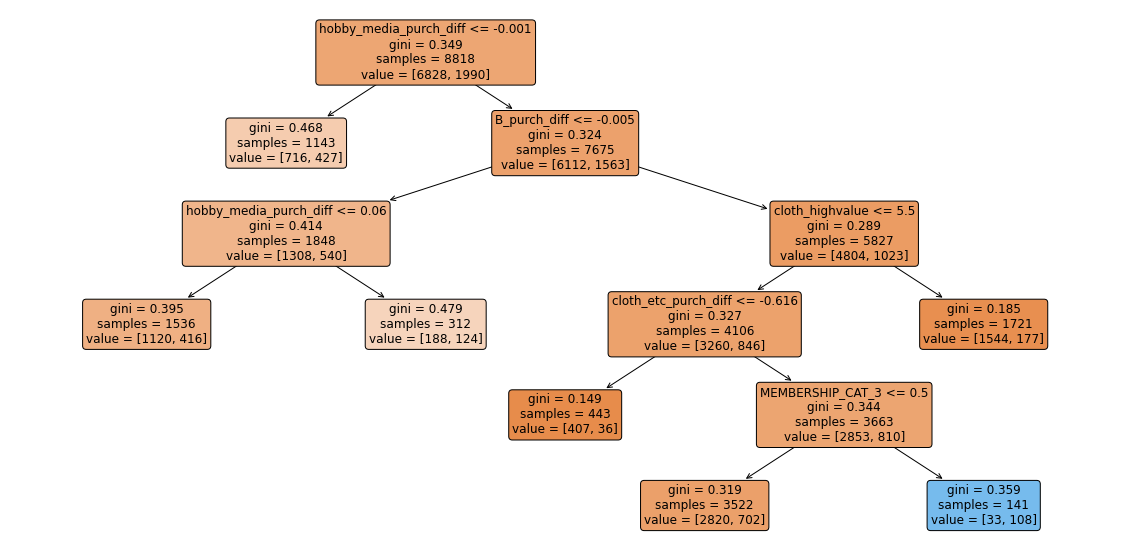

In [42]:
features = data4.drop(['labels'],axis=1)
target=  data4.labels
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.2, random_state=0)
from sklearn import tree
# from sklearn.tree import export_graphviz

# from sklearn.model_selection import GridSearchCV
# dt_clf = DecisionTreeClassifier()
# parameters = {'min_samples_split':[100,200],'max_features':[5,10,15,20],'max_depth':[5,7,10,15,20]}

# grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
# grid_dtree.fit(features,target)

# print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
# print('GridSearchCV 최고 정확도: {0:4f}'.format(grid_dtree.best_score_))



from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=5,max_depth=5,max_leaf_nodes=7)
dt_tree.fit(features,target)
pred = dt_tree.predict(X_test)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_tree, filled=True,
              feature_names=X_train.columns,
             
              rounded=True, fontsize=12)
plt.show()
plt.close()

# <3번 특성># -멤버십 가입자, 여성, PURCHAMOUNT기준 3이상이 95%이상 (가장중요고객)
# - hobby_media 방문횟수=> 유지: 70%
# - B사에서 구매감소 혹은 유지고객이 많다.
# - cloth_etc DIFF => 거의 대부분이 증가 혹은 감소(비율은 유지가 좀더 많음)
# - A 제휴사 거의 대부분 diff 증가고객이 많음
# - HOBBY MEDIA DIFF 증가보다 감소가 더 많음(-0.327 기준)
# -

SyntaxError: ignored

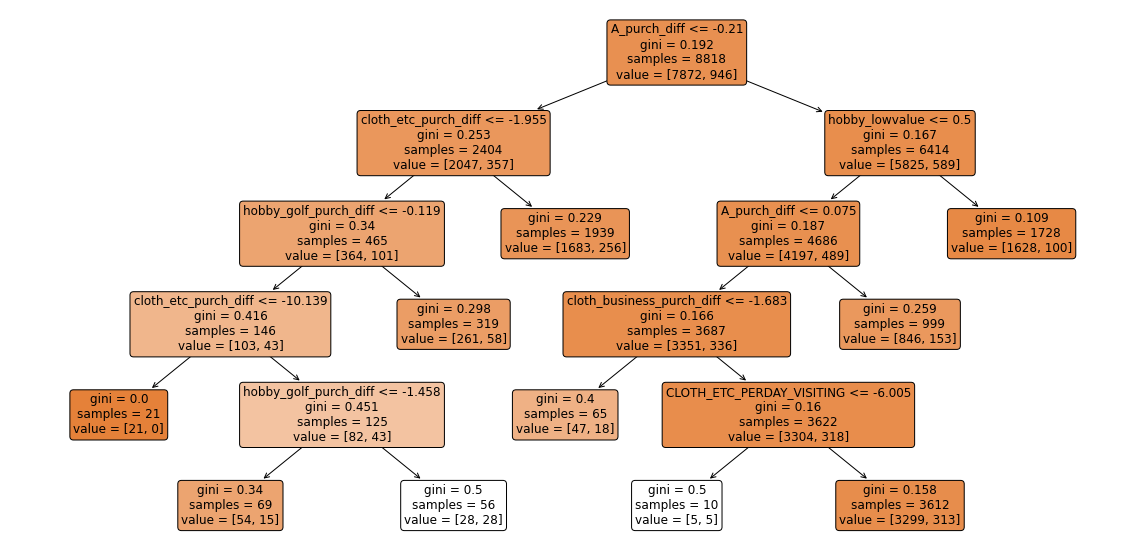

In [44]:
features = data5.drop(['labels'],axis=1)
target=  data5.labels
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.2, random_state=0)
from sklearn import tree
# from sklearn.tree import export_graphviz

# from sklearn.model_selection import GridSearchCV
# dt_clf = DecisionTreeClassifier()
# parameters = {'min_samples_split':[100,200],'max_features':[5,10,15,20],'max_depth':[5,7,10,15,20]}

# grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)
# grid_dtree.fit(features,target)

# print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
# print('GridSearchCV 최고 정확도: {0:4f}'.format(grid_dtree.best_score_))



from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
dt_tree = DecisionTreeClassifier(min_samples_leaf= 10, max_features=8,max_depth=5,max_leaf_nodes=10)
dt_tree.fit(features,target)
pred = dt_tree.predict(X_test)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_tree, filled=True,
              feature_names=X_train.columns,
             
              rounded=True, fontsize=12)
plt.show()
plt.close()

# #4 클러스터 -1/5 멤버십가입 여성(비교적 돈을 많이소비), 4/5 멤버십 미가입여성(FREQUENCY가 낮은고객이 대부분),  
# - 취미 perday 거의 대부분 유지 (90% 이상)
# - 의류_캐주얼_가을방문횟수가 감소한사람이 많음
# - CLOTH_BUSINESS 방문횟수 감소한 사람이 많음
#-

In [ ]:
import pickle 
with open("data", "wb") as w:
    pickle.dump(data, w)